# study of cantilever beam

Consider a cantilever beam using the Finite Element Method library GetFEM++.

## Creating a Model

Now we are ready, import the library.

In [1]:
import getfem as gf
import numpy as np
import numpy.testing as npt
import pandas as pd
import pyvista as pv

The review cases are as follows. GetFEM++ uses FEM_PRODUCT and IM_PRODUCT to two-dimensional the finite element method and the integration method, respectively. For quadratic elements, the Gaussian integration point is 3. IM_GAUSS1D(K) represents the integration point of $K/2+1$ points. The element uses plane strain elements. Set up these meshes, the finite element method and the integration method.

In [2]:
cases = [
    "case11",
    "case12",
    "case13",
    "case14",
    "case21",
    "case22",
    "case23",
    "case24",
    "case31",
    "case32",
    "case33",
    "case34",
    "case41",
    "case42",
    "case43",
    "case44",
]

In [3]:
xs = [
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
    4,
    4,
    4,
    16,
]
ys = [
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
    1,
    2,
    4,
    8,
]

In [4]:
fem_names = [
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 2)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
    "FEM_PK_WITH_CUBIC_BUBBLE(1, 1)",
]

In [5]:
methods = [
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(2)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(0)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
    "IM_GAUSS1D(4)",
]

In [6]:
pd.options.display.float_format = "{:.2f}".format
data = []
columns = ["Case Name", "Mesh", "Finite Element Method", "Integration Method"]
for case, x, y, fem_name, method in zip(cases, xs, ys, fem_names, methods):
    data.append([case, str(x) + "x" + str(y), fem_name, method])
df = pd.DataFrame(data=data, columns=columns)
df

,Case Name,Mesh,Finite Element Method,Integration Method
0,case11,4x1,"FEM_PK(1, 2)",IM_GAUSS1D(4)
1,case12,4x2,"FEM_PK(1, 2)",IM_GAUSS1D(4)
2,case13,4x4,"FEM_PK(1, 2)",IM_GAUSS1D(4)
3,case14,16x8,"FEM_PK(1, 2)",IM_GAUSS1D(4)
4,case21,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(2)
5,case22,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(2)
6,case23,4x4,"FEM_PK(1, 1)",IM_GAUSS1D(2)
7,case24,16x8,"FEM_PK(1, 1)",IM_GAUSS1D(2)
8,case31,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(0)
9,case32,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(0)


### Mesh

The overall size of the model is L = 10 mm in length, h = 1 mm in height, and b = 1 mm in depth. In general, a slender ratio of 1: 10 is considered a beam element.

In [7]:
L = 10.0
b = 1.0
h = 1.0
meshs = []
for case, x, y in zip(cases, xs, ys):
    X = np.arange(x + 1) * L / x
    Y = np.arange(y + 1) * h / y
    mesh = gf.Mesh("cartesian", X, Y)
    meshs.append(mesh)
    mesh.export_to_vtk("mesh_" + case + ".vtk", "ascii")

Outputs an image of each mesh.

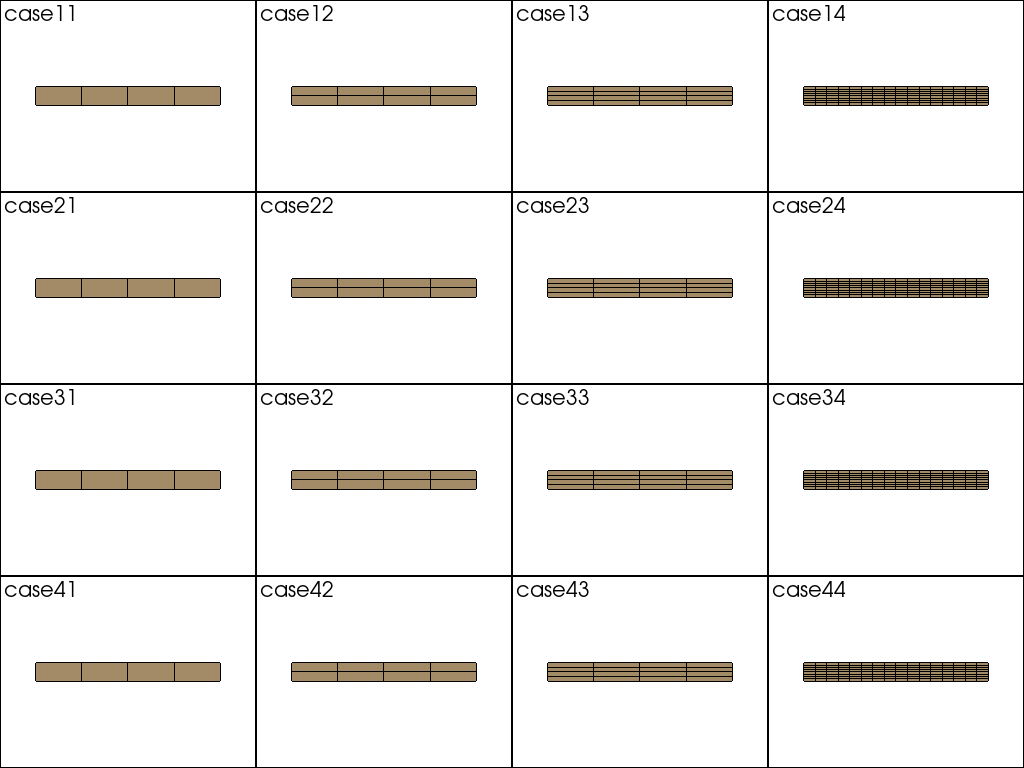

In [8]:
p = pv.Plotter(shape=(4, 4))

p.subplot(0, 0)
mesh = pv.read("mesh_" + cases[0] + ".vtk")
p.add_text(cases[0], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(0, 1)
mesh = pv.read("mesh_" + cases[1] + ".vtk")
p.add_text(cases[1], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(0, 2)
mesh = pv.read("mesh_" + cases[2] + ".vtk")
p.add_text(cases[2], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(0, 3)
mesh = pv.read("mesh_" + cases[3] + ".vtk")
p.add_text(cases[3], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(1, 0)
mesh = pv.read("mesh_" + cases[4] + ".vtk")
p.add_text(cases[4], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(1, 1)
mesh = pv.read("mesh_" + cases[5] + ".vtk")
p.add_text(cases[5], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(1, 2)
mesh = pv.read("mesh_" + cases[6] + ".vtk")
p.add_text(cases[6], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(1, 3)
mesh = pv.read("mesh_" + cases[7] + ".vtk")
p.add_text(cases[7], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(2, 0)
mesh = pv.read("mesh_" + cases[8] + ".vtk")
p.add_text(cases[8], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(2, 1)
mesh = pv.read("mesh_" + cases[9] + ".vtk")
p.add_text(cases[9], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(2, 2)
mesh = pv.read("mesh_" + cases[10] + ".vtk")
p.add_text(cases[10], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(2, 3)
mesh = pv.read("mesh_" + cases[11] + ".vtk")
p.add_text(cases[11], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(3, 0)
mesh = pv.read("mesh_" + cases[12] + ".vtk")
p.add_text(cases[12], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(3, 1)
mesh = pv.read("mesh_" + cases[13] + ".vtk")
p.add_text(cases[13], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(3, 2)
mesh = pv.read("mesh_" + cases[14] + ".vtk")
p.add_text(cases[14], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.subplot(3, 3)
mesh = pv.read("mesh_" + cases[15] + ".vtk")
p.add_text(cases[15], font_size=10)
p.add_mesh(mesh, color="tan", show_edges=True)

p.show(cpos="xy")

### Region

Sets the area on the left side of the mesh where the Dirichlet condition is set. The right side sets the area for setting the Neumann condition.

In [9]:
TOP_BOUND = 1
RIGHT_BOUND = 2
LEFT_BOUND = 3
BOTTOM_BOUND = 4

for mesh in meshs:
    fb1 = mesh.outer_faces_with_direction([0.0, 1.0], 0.01)
    fb2 = mesh.outer_faces_with_direction([1.0, 0.0], 0.01)
    fb3 = mesh.outer_faces_with_direction([-1.0, 0.0], 0.01)
    fb4 = mesh.outer_faces_with_direction([0.0, -1.0], 0.01)
    mesh.set_region(TOP_BOUND, fb1)
    mesh.set_region(RIGHT_BOUND, fb2)
    mesh.set_region(LEFT_BOUND, fb3)
    mesh.set_region(BOTTOM_BOUND, fb4)

### Finite Element Method
Create a MeshFem object and associate the mesh with the finite element method.

In [10]:
fems = []
for fem_name in fem_names:
    fems.append(gf.Fem("FEM_PRODUCT(" + fem_name + "," + fem_name + ")"))

In [11]:
mfus = []
for mesh, fem in zip(meshs, fems):
    mfu = gf.MeshFem(mesh, 2)
    mfu.set_fem(fem)
    mfus.append(mfu)

### Integral method
Associate the integration method with the mesh.

In [12]:
ims = []
for method in methods:
    ims.append(gf.Integ("IM_PRODUCT(" + method + ", " + method + ")"))

In [13]:
mims = []
for mesh, im in zip(meshs, ims):
    mim = gf.MeshIm(mesh, im)
    mims.append(mim)

### Variable
Define the model object and set the variable "u".

In [14]:
mds = []
for mfu in mfus:
    md = gf.Model("real")
    md.add_fem_variable("u", mfu)
    mds.append(md)

### Properties
Define properties as constants for the model object. The Young's modulus of steel is $E = 205000\times 10^6N/m^2$. Also set Poisson's ratio $\nu = 0.0$ to ignore the Poisson effect.

In [15]:
E = 10000  # N/mm2
Nu = 0.0

for md in mds:
    md.add_initialized_data("E", E)
    md.add_initialized_data("Nu", Nu)

### Plane Strain Element
Defines the plane strain element for variable 'u'.

In [16]:
for md, mim in zip(mds, mims):
    md.add_isotropic_linearized_elasticity_brick_pstrain(mim, "u", "E", "Nu")

### Boundary Conditions

Set the Dirichlet condition for the region on the left side.

In [17]:
for (md, mim, mfu, fem) in zip(mds, mims, mfus, fems):
    if fem.is_lagrange():
        md.add_Dirichlet_condition_with_simplification("u", LEFT_BOUND)
    else:
        md.add_Dirichlet_condition_with_multipliers(mim, "u", mfu, LEFT_BOUND)

Set the Neumann boundary condition on the right side.

In [18]:
F = 1.0  # N/mm2
for (md, mfu, mim) in zip(mds, mfus, mims):
    md.add_initialized_data("F", [0, F / (b * h)])
    md.add_source_term_brick(mim, "u", "F", RIGHT_BOUND)

## Solve

Solve the simultaneous equations of the model object to find the value of the variable 'u'.

In [19]:
for md in mds:
    md.solve()

The constraint on the left end has a displacement of 0.0.

In [20]:
for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable("u")
    dof = mfu.basic_dof_on_region(LEFT_BOUND)
    npt.assert_almost_equal(abs(np.max(u[dof])), 0.0)

## Review results

Output and visualize the results of each case to vtk files.

In [21]:
for md, mfu, case in zip(mds, mfus, cases):
    u = md.variable("u")
    mfu.export_to_vtk("u_" + case + ".vtk", "ascii", mfu, u, "u")

### Computation of Theoretical Solutions
Calculates the deflection at each coordinate for comparison with the theoretical solution. The theoretical solution for a cantilever beam subjected to a concentrated load is as follows.

$w\left(x\right)=\dfrac{FL^3}{3EI}$

In [22]:
I = b * h ** 3 / 12
w = F * L ** 3 / (3 * E * I)
w

0.4

### deformation diagram of case11

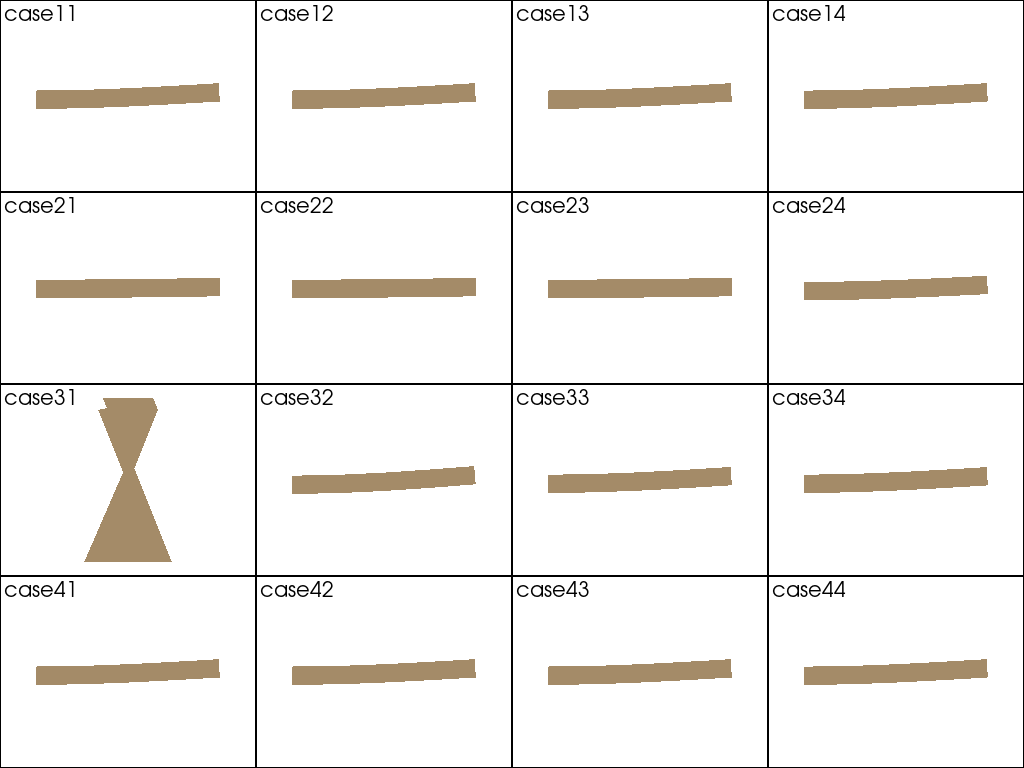

In [23]:
import pyvista as pv

p = pv.Plotter(shape=(4, 4))

p.subplot(0, 0)
mesh = pv.read("u_" + cases[0] + ".vtk")
p.add_text(cases[0], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(0, 1)
mesh = pv.read("u_" + cases[1] + ".vtk")
p.add_text(cases[1], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(0, 2)
mesh = pv.read("u_" + cases[2] + ".vtk")
p.add_text(cases[2], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(0, 3)
mesh = pv.read("u_" + cases[3] + ".vtk")
p.add_text(cases[3], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(1, 0)
mesh = pv.read("u_" + cases[4] + ".vtk")
p.add_text(cases[4], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(1, 1)
mesh = pv.read("u_" + cases[5] + ".vtk")
p.add_text(cases[5], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(1, 2)
mesh = pv.read("u_" + cases[6] + ".vtk")
p.add_text(cases[6], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(1, 3)
mesh = pv.read("u_" + cases[7] + ".vtk")
p.add_text(cases[7], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(2, 0)
mesh = pv.read("u_" + cases[8] + ".vtk")
p.add_text(cases[8], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(2, 1)
mesh = pv.read("u_" + cases[9] + ".vtk")
p.add_text(cases[9], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(2, 2)
mesh = pv.read("u_" + cases[10] + ".vtk")
p.add_text(cases[10], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(2, 3)
mesh = pv.read("u_" + cases[11] + ".vtk")
p.add_text(cases[11], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(3, 0)
mesh = pv.read("u_" + cases[12] + ".vtk")
p.add_text(cases[12], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(3, 1)
mesh = pv.read("u_" + cases[13] + ".vtk")
p.add_text(cases[13], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(3, 2)
mesh = pv.read("u_" + cases[14] + ".vtk")
p.add_text(cases[14], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.subplot(3, 3)
mesh = pv.read("u_" + cases[15] + ".vtk")
p.add_text(cases[15], font_size=10)
p.add_mesh(mesh.warp_by_vector("u"), color="tan")

p.show(cpos="xy")

### Comparison with Theoretical Solutions

In [24]:
b = 1.0
I = b * h ** 3.0 / 12.0
dmax = 1.0 / 3.0 * (F * L ** 3) / (E * I)
dmax

0.4

Calculates the ratio of deformation to theoretical solution for each case.


In [25]:
pd.options.display.float_format = "{:.2f}".format


data = []

columns = [
    "case name",
    "mesh",
    "finite element method",
    "integration method",
    "ratio with theory",
]

for case, x, y, fem_name, method, md, mfu in zip(
    cases, xs, ys, fem_names, methods, mds, mfus
):
    u = md.variable("u")
    dof = mfu.basic_dof_on_region(RIGHT_BOUND)
    data.append([case, str(x) + "x" + str(y), fem_name, method, max(u[dof] / dmax)])
df = pd.DataFrame(data=data, columns=columns)
df

,case name,mesh,finite element method,integration method,ratio with theory
0,case11,4x1,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.00
1,case12,4x2,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.00
2,case13,4x4,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.00
3,case14,16x8,"FEM_PK(1, 2)",IM_GAUSS1D(4),1.01
4,case21,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.24
5,case22,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.24
6,case23,4x4,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.24
7,case24,16x8,"FEM_PK(1, 1)",IM_GAUSS1D(2),0.84
8,case31,4x1,"FEM_PK(1, 1)",IM_GAUSS1D(0),751684841570.97
9,case32,4x2,"FEM_PK(1, 1)",IM_GAUSS1D(0),1.32
